In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import re

In [30]:
df_regions=pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/notebooks/fred/PEPR_Marseille/Selected subjects/For each subject/Evaluation_metrics_with_v4/Quantile for each subject/List_of_regions")

In [31]:
df_regions

,Unnamed: 0,index_subject,list of regions
0,0,5,"[('S.F.median-S.F.pol.tr.-S.F.sup.', 'R'), ('S..."
1,1,6,"[('S.Call.-S.s.P.-S.intraCing.', 'L'), ('S.s.P..."
2,2,14,"[('S.T.i.-S.T.s.-S.T.pol.', 'L'), ('S.T.i.-S.O..."
3,3,16,"[('F.Coll.-S.Rh.', 'L'), ('S.T.i.-S.T.s.-S.T.p..."
4,4,17,"[('S.F.median-S.F.pol.tr.-S.F.sup.', 'R'), ('S..."
...,...,...,...
114,114,685,"[('S.Call.', 'L'), ('S.Call.-S.s.P.-S.intraCin..."
115,115,690,"[('S.Po.C.', 'L'), ('S.C.-S.Po.C.', 'L'), ('F...."
116,116,694,"[('S.T.i.-S.T.s.-S.T.pol.', 'L'), ('Lobule_par..."
117,117,699,"[('S.F.median-S.F.pol.tr.-S.F.sup.', 'R'), ('S..."


In [32]:
df_regions.iloc[:, -1] = np.random.permutation(df_regions.iloc[:, -1].values)

In [33]:
df_regions

,Unnamed: 0,index_subject,list of regions
0,0,5,"[('S.s.P.-S.Pa.int.', 'R'), ('F.P.O.-S.Cu.-Sc...."
1,1,6,"[('S.F.median-S.F.pol.tr.-S.F.sup.', 'R'), ('S..."
2,2,14,"[('F.Coll.-S.Rh.', 'R'), ('F.P.O.-S.Cu.-Sc.Cal..."
3,3,16,"[('S.T.i.-S.O.T.lat.', 'L')]"
4,4,17,"[('S.F.median-S.F.pol.tr.-S.F.sup.', 'L'), ('S..."
...,...,...,...
114,114,685,"[('S.C.-S.Po.C.', 'R'), ('F.C.L.p.-subsc.-F.C...."
115,115,690,"[('S.F.inf.-BROCA-S.Pe.C.inf.', 'L'), ('F.C.L...."
116,116,694,"[('S.Po.C.', 'R'), ('S.C.-S.Po.C.', 'R'), ('Lo..."
117,117,699,"[('F.C.M.post.-S.p.C.', 'L'), ('S.F.int.-F.C.M..."


In [34]:
def compute_quantile(L,a):
    r=np.mean(L <= a)
    return r

In [35]:
def compute_quantile_list(L,M):
    result=[]
    for a in M:
        result.append(compute_quantile(L,a))
    return result

In [36]:
entropy=[]
chamfer=[]
SVM=[]

In [37]:
dir_path = "/neurospin/tmp/fred/models/2025-11-10"

In [38]:
def find_subfolder_starting_with(c, c2):
    for name in os.listdir(c):
        full_path = os.path.join(c, name)
        if os.path.isdir(full_path) and name.startswith(c2):
            return full_path
    return None

In [39]:
error_PEPR= pd.read_csv("/neurospin/tmp/fred/models/2025-11-10/SC-sylv_right_UKB_16-20-03_123/PEPR_Marseille/Reconstruction_error.csv")

selected_index = np.load("/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/notebooks/fred/PEPR_Marseille/All the subjects/histogram_non_zero/index_to_save.npy")

error_PEPR= error_PEPR.loc[selected_index].reset_index(drop=True)

In [40]:
import ast

In [41]:
all_regions= []
for i in df_regions["index_subject"]:

    L=df_regions.loc[df_regions["index_subject"] == i, "list of regions"].iloc[0]
    L = ast.literal_eval(L)
    all_regions.append(L)
L_flat = [x for sub in all_regions for x in sub]


In [42]:
L=[]
for l in L_flat:
    a=l[0].replace(".","")
    if l[1]=='R':
        a+="_right"
    elif l[1]=='L':
        a+="_left"
    L.append(a)

In [43]:
L

['SsP-SPaint_right',
 'FPO-SCu-ScCal_right',
 'Lobule_parietal_sup_right',
 'FIP-FIPPoCinf_right',
 'SFmedian-SFpoltr-SFsup_right',
 'SFinter-SFsup_right',
 'SFint-FCMant_right',
 'SFint-SR_right',
 'FColl-SRh_right',
 'FPO-SCu-ScCal_right',
 'ScCal-SLi_right',
 'STi-SOTlat_left',
 'SFmedian-SFpoltr-SFsup_left',
 'SFinf-BROCA-SPeCinf_left',
 'SFinter-SFsup_left',
 'SPoC_left',
 'SC-SPoC_left',
 'FIP-FIPPoCinf_left',
 'FCLp-subsc-FCLa-INSULA_left',
 'Lobule_parietal_sup_left',
 'STsbr_left',
 'FIP-FIPPoCinf_left',
 'OCCIPITAL_left',
 'STi-STs-STpol_left',
 'STsbr_left',
 'STs_left',
 'FCLp-subsc-FCLa-INSULA_left',
 'SFmedian-SFpoltr-SFsup_left',
 'SFinter-SFsup_left',
 'SFinf-BROCA-SPeCinf_left',
 'STi-STs-STpol_left',
 'STs_left',
 'FCLp-subsc-FCLa-INSULA_left',
 'FPO-SCu-ScCal_left',
 'ScCal-SLi_left',
 'STi-STs-STpol_left',
 'STi-SOTlat_left',
 'STs_left',
 'SPoC_left',
 'SC-SPoC_left',
 'Lobule_parietal_sup_left',
 'FIP-FIPPoCinf_left',
 'SC-sylv_left',
 'SC-SPeC_left',
 'SPoC_left'

In [44]:
df = pd.DataFrame(L, columns=["region"]) \
       .value_counts() \
       .reset_index(name="p")

In [45]:
df

,region,p
0,STi-STs-STpol_left,29
1,STs_left,22
2,STi-SOTlat_left,20
3,FCLp-subsc-FCLa-INSULA_left,19
4,FColl-SRh_right,17
5,STsbr_left,16
6,STi-STs-STpol_right,15
7,FColl-SRh_left,13
8,SC-SPoC_left,12
9,FIP-FIPPoCinf_left,12


In [46]:
df.to_csv("frequency_for_each_region")

In [ ]:
from collections import Counter

counts = Counter(L)
print(counts)


Counter({('S.T.i.-S.T.s.-S.T.pol.', 'L'): 29, ('S.T.s.', 'L'): 22, ('S.T.i.-S.O.T.lat.', 'L'): 20, ('F.C.L.p.-subsc.-F.C.L.a.-INSULA.', 'L'): 19, ('F.Coll.-S.Rh.', 'R'): 17, ('S.T.s.br.', 'L'): 16, ('S.T.i.-S.T.s.-S.T.pol.', 'R'): 15, ('F.Coll.-S.Rh.', 'L'): 13, ('S.T.i.-S.O.T.lat.', 'R'): 12, ('S.C.-S.Po.C.', 'L'): 12, ('F.I.P.-F.I.P.Po.C.inf.', 'L'): 12, ('S.F.median-S.F.pol.tr.-S.F.sup.', 'R'): 11, ('S.T.s.', 'R'): 11, ('F.C.L.p.-subsc.-F.C.L.a.-INSULA.', 'R'): 11, ('S.F.inter.-S.F.sup.', 'R'): 10, ('S.F.inf.-BROCA-S.Pe.C.inf.', 'L'): 10, ('S.Po.C.', 'L'): 9, ('Lobule_parietal_sup.', 'L'): 9, ('S.F.inf.-BROCA-S.Pe.C.inf.', 'R'): 8, ('S.F.int.-S.R.', 'L'): 8, ('S.C.-S.Pe.C.', 'R'): 7, ('S.C.-S.Pe.C.', 'L'): 7, ('S.T.s.br.', 'R'): 7, ('S.F.inter.-S.F.sup.', 'L'): 7, ('F.P.O.-S.Cu.-Sc.Cal.', 'L'): 6, ('S.C.-sylv.', 'L'): 6, ('S.C.-S.Po.C.', 'R'): 6, ('Lobule_parietal_sup.', 'R'): 6, ('F.I.P.-F.I.P.Po.C.inf.', 'R'): 6, ('S.F.median-S.F.pol.tr.-S.F.sup.', 'L'): 6, ('S.F.int.-F.C.M.ant.',

In [19]:
L_flat[0]

('S.F.median-S.F.pol.tr.-S.F.sup.', 'R')

In [91]:
len(counts)

55

In [92]:

for i in df_regions["index_subject"]:
    print(i)


    entropy_region=[]
    chamfer_region=[]
    SVM_region=[]
    L=df_regions.loc[df_regions["index_subject"] == i, "list of regions"].iloc[0]

    L = ast.literal_eval(L)
    dico_entropy={}
    for all_region in L:
        
        side =all_region[1]
        region= all_region[0]

        region= region.replace(".","")

        if side=='L':
            region= region + "_left"
        if side=='R':
            region= region + "_right"

        dir_region = find_subfolder_starting_with(dir_path, region)

        entropy_PEPR= pd.read_csv(os.path.join(dir_region, "PEPR_Marseille", "Quantiles_Reconstruction_error.csv"))
        chamfer_PEPR= pd.read_csv(os.path.join(dir_region, "PEPR_Marseille", "Quantiles_Chamfer_distance.csv"))
        SVM_PEPR= pd.read_csv(os.path.join(dir_region, "PEPR_Marseille", "Quantiles_Residualisation_Score_SVM.csv"))

        entropy_PEPR= entropy_PEPR.loc[selected_index].reset_index(drop=True)
        chamfer_PEPR=chamfer_PEPR.loc[selected_index].reset_index(drop=True)
        SVM_PEPR=SVM_PEPR.loc[selected_index].reset_index(drop=True)

        entropy_region.append(entropy_PEPR.iloc[i,-1])
        chamfer_region.append(chamfer_PEPR.iloc[i,-1])
        SVM_region.append(SVM_PEPR.iloc[i,-1])

        dico_entropy[region]=entropy_PEPR.iloc[i,-1]
    entropy_all=[]
    chamfer_all=[]
    SVM_all=[]

    for subdir in os.listdir(dir_path):
        entropy_path = os.path.join(dir_path,subdir,"PEPR_Marseille", "Quantiles_Reconstruction_error.csv")
        chamfer_path = os.path.join(dir_path, subdir, "PEPR_Marseille", "Quantiles_Chamfer_distance.csv")
        SVM_path = os.path.join(dir_path,subdir, "PEPR_Marseille", "Quantiles_Residualisation_Score_SVM.csv")

        entropy_PEPR= pd.read_csv(entropy_path)
        chamfer_PEPR= pd.read_csv(chamfer_path)
        SVM_PEPR= pd.read_csv(SVM_path)

        entropy_PEPR= entropy_PEPR.loc[selected_index].reset_index(drop=True)
        chamfer_PEPR=chamfer_PEPR.loc[selected_index].reset_index(drop=True)
        SVM_PEPR=SVM_PEPR.loc[selected_index].reset_index(drop=True)

        entropy_all.append(entropy_PEPR.iloc[i,-1])
        chamfer_all.append(chamfer_PEPR.iloc[i,-1])
        SVM_all.append(SVM_PEPR.iloc[i,-1])

    entropy.append(np.mean(compute_quantile_list(entropy_all, entropy_region)))
    chamfer.append(np.mean(compute_quantile_list(chamfer_all, chamfer_region)))
    SVM.append(np.mean(compute_quantile_list(SVM_all, SVM_region)))

entropy= np.array(entropy)
chamfer= np.array(chamfer)
SVM= np.array(SVM)

1


4
6
8
13
16
18
27
36
37
45
48
53
56
60
63
68
73
78
79
82
87
88
90
99
103
107
111
115
118
120
126
128
131
139
150
151
157
159
166
169
172
173
174
175
181
193
200
202
210
218
224
228
235
243
244
245
247
249
255
257
269
270
272
274
275
276
286
287
288
293
297
299
310
312
313
315
318
323
324
326
332
334
348
351
355
357
358
370
373
374
375
376
383
385
386
392
398
406
412
415
417
418
432
464
465
468
469
479
482
496
507
508
513
515
523
524
525
527
528
541
545
556
557
558
571
573
593
596
597
599
604
606
612
622
634
637
641
644
645
649
653
664
666
675
680
685
690
694
707
712
726
736
737
743
746
761
774
778
792


In [93]:
len(entropy)

160

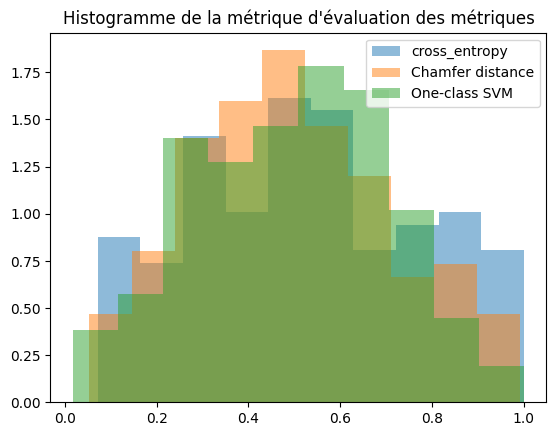

In [94]:
plt.hist(entropy, density=True, alpha=0.5, label="cross_entropy")
plt.hist(chamfer, density=True, alpha=0.5, label="Chamfer distance")
plt.hist(SVM, density=True, alpha=0.5, label="One-class SVM")
plt.title("Histogramme de la métrique d'évaluation des métriques")
plt.legend()
plt.show()

In [95]:
np.mean(entropy)

np.float64(0.5287027441184808)

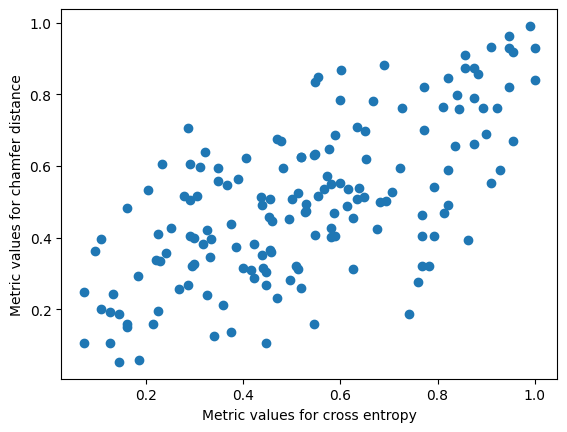

In [96]:
plt.scatter(entropy, chamfer)
plt.xlabel("Metric values for cross entropy")
plt.ylabel("Metric values for chamfer distance")
plt.show()

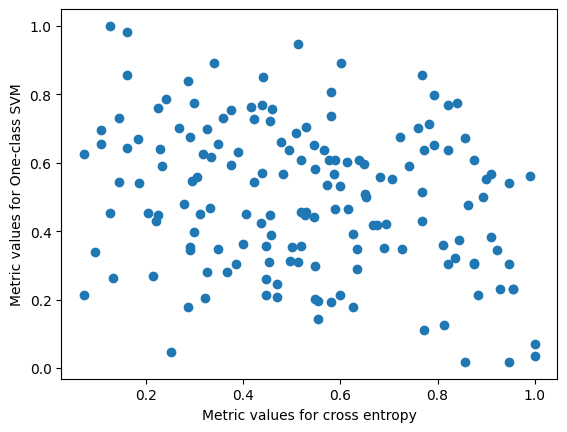

In [97]:
plt.scatter(entropy, SVM)
plt.xlabel("Metric values for cross entropy")
plt.ylabel("Metric values for One-class SVM")
plt.show()

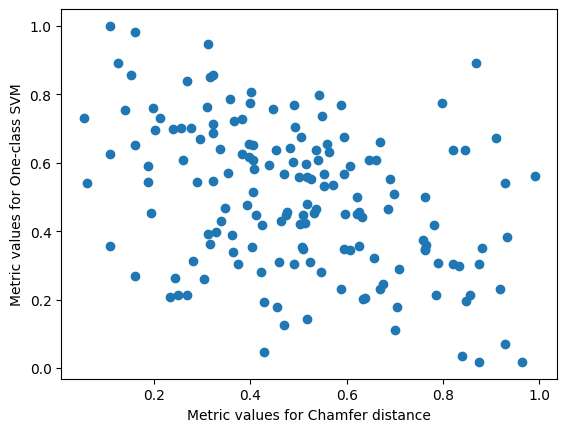

In [98]:
plt.scatter(chamfer, SVM)
plt.xlabel("Metric values for Chamfer distance")
plt.ylabel("Metric values for One-class SVM")
plt.show()

Pour les sujets avec Résection

In [99]:
df_PEPR= pd.read_excel("/neurospin/dico/data/human/PEPR_Marseille/PourTheotime.ods", engine="odf")


In [100]:
df_cross_entropy = pd.read_csv("/neurospin/tmp/fred/models/2025-11-10/SC-sylv_right_UKB_16-20-03_123/PEPR_Marseille/Reconstruction_error.csv")

In [101]:
selected_index = np.load("/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/notebooks/fred/PEPR_Marseille/All the subjects/histogram_non_zero/index_to_save.npy")

In [102]:
selected_index_1 = []

In [103]:


for a in df_cross_entropy.iloc[:, 0]:
    if a=="0109GRE_10102016":
        selected_index_1.append(978)
    if a=="0109GRE_12112016":
        selected_index_1.append(979)
    if a=="0164ROT_29012018":
        selected_index_1.append(1158)
    if a=="0168ROT_01032018":
        selected_index_1.append(1172)
    if a=="0168ROT_17092018":
        selected_index_1.append(1173)

    id = a[:7]

    matches = df_PEPR.index[df_PEPR.iloc[:, 0].str[:7] == id]
    if len(matches) == 1:
        selected_index_1.append(matches[0])
    else:
        #print(len(matches))
        j=0
        for i in matches:
            c= len(df_PEPR.iloc[i, 0])
            if c==9:
                id  = a[:7] + a[-2:]
                if df_PEPR.iloc[i, 0]==id:
                    selected_index_1.append(i)
                    j+=1
            elif c==11:
                id = a[:7]+ a[10:12]+a[-2:]
                if df_PEPR.iloc[i, 0]==id:
                    selected_index_1.append(i)
                    j+=1
            elif c==10:
                id = a[:7]+ a[11]+a[-2:]
                if df_PEPR.iloc[i, 0]==id:
                    selected_index_1.append(i)
                    j+=1
            elif c==7:
                selected_index_1.append(747)
                j+=1
selected_index_1= np.array(selected_index_1)

In [104]:
df_PEPR= df_PEPR.loc[selected_index_1].reset_index(drop=True) #1 ere sélection
df_PEPR= df_PEPR.loc[selected_index].reset_index(drop=True) #2e sélection


In [105]:
idx = df_PEPR.index[df_PEPR["Lesion type"].str.endswith("Resection", na=False)]


In [106]:
idx2 = df_regions.index[df_regions["index_subject"].isin(idx)].to_numpy()


In [107]:
entropy_Resection=entropy[idx2]
chamfer_Resection=chamfer[idx2]
SVM_Resection=SVM[idx2]

In [108]:
len(entropy_Resection)

34

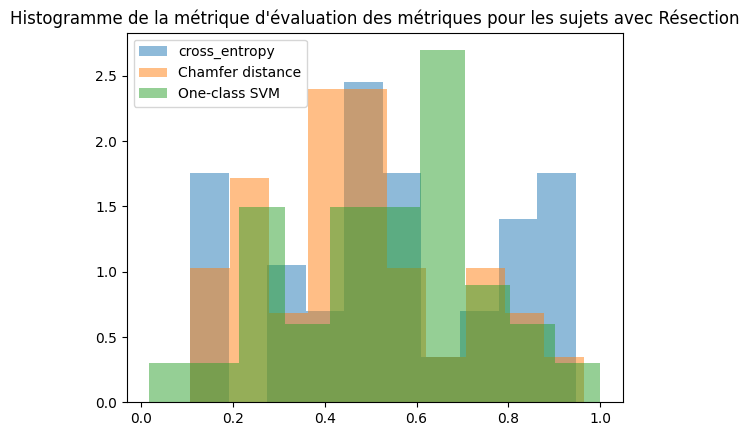

In [109]:
plt.hist(entropy_Resection, density=True, alpha=0.5, label="cross_entropy")
plt.hist(chamfer_Resection, density=True, alpha=0.5, label="Chamfer distance")
plt.hist(SVM_Resection, density=True, alpha=0.5, label="One-class SVM")
plt.title("Histogramme de la métrique d'évaluation des métriques pour les sujets avec Résection")
plt.legend()
plt.show()

Pour les sujets avec Polymicrogyrie

In [110]:
idx = df_PEPR.index[df_PEPR["Lesion type"].str.endswith("Polymicrogyria", na=False)]


In [111]:
idx3 = df_regions.index[df_regions["index_subject"].isin(idx)].to_numpy()


In [112]:
entropy_polymicrogyrie=entropy[idx3]
chamfer_polymicrogyrie=chamfer[idx3]
SVM_polymicrogyrie=SVM[idx3]

In [113]:
len(entropy_polymicrogyrie)

5

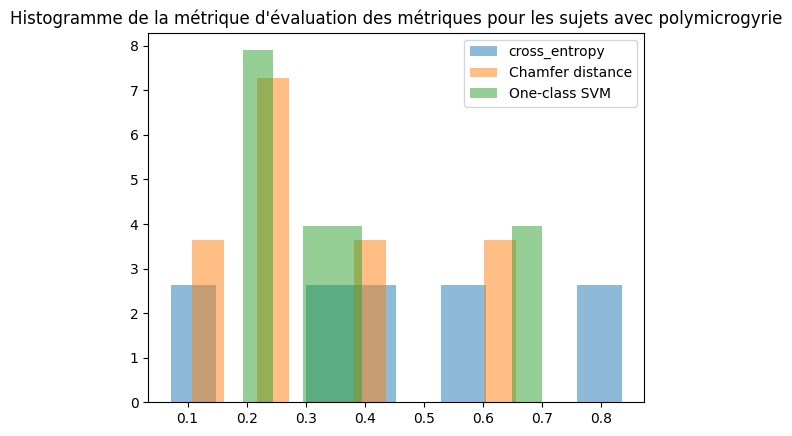

In [114]:
plt.hist(entropy_polymicrogyrie, density=True, alpha=0.5, label="cross_entropy")
plt.hist(chamfer_polymicrogyrie, density=True, alpha=0.5, label="Chamfer distance")
plt.hist(SVM_polymicrogyrie, density=True, alpha=0.5, label="One-class SVM")
plt.title("Histogramme de la métrique d'évaluation des métriques pour les sujets avec polymicrogyrie")
plt.legend()
plt.show()